In [1]:
import sys
sys.path.append("../")
from pathlib import Path

import numpy as np
from gensim.models import Word2Vec

from const import gnps
from utils import cosine_similarity, embedding

DIR = Path("/data1/xp/code/specEmbedding/score_distribution/pair")

In [2]:
show_progress_bar = False
model = Word2Vec.load("orbitrap.model")

In [3]:
spectra = np.load(gnps.ORBITRAP_TEST_QUERY, allow_pickle=True)

spectra_embedding, _ = embedding(model,  spectra, show_progress_bar)
cosine_scores = cosine_similarity(spectra_embedding, spectra_embedding)
mask = np.diag(np.ones((cosine_scores.shape[0]))).astype(bool)
mask = ~mask
cosine_scores = cosine_scores[mask]
np.save("/data1/xp/code/specEmbedding/score_distribution/tanimoto/Spec2Vec.npy", cosine_scores.flatten())

In [4]:
query = np.load(gnps.ORBITRAP_TEST_QUERY, allow_pickle=True)
ref = np.load(gnps.ORBITRAP_TEST_REF, allow_pickle=True)

query_embedding, query_smiles = embedding(model,  query, show_progress_bar)
ref_embedding, ref_smiles = embedding(model,  ref, show_progress_bar)
cosine_scores = cosine_similarity(query_embedding, ref_embedding)

positive_indices = np.load(DIR / "positive_indices.npy", allow_pickle=True).item()
negative_indices = np.load(DIR / "negative_indices.npy", allow_pickle=True).item()

data = {
    "positive": cosine_scores[positive_indices["row"], positive_indices["col"]],
    "negative": cosine_scores[negative_indices["row"], negative_indices["col"]]
}

np.save(DIR / "Spec2Vec.npy", data)

<Axes: ylabel='Density'>

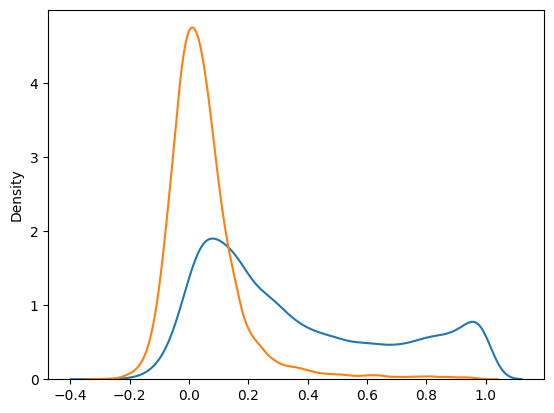

In [5]:
import seaborn as sns

sns.kdeplot(data["positive"])
sns.kdeplot(data["negative"])